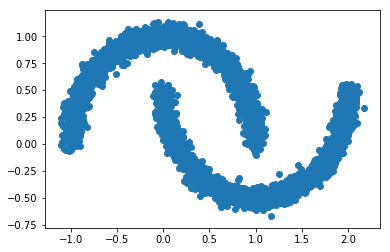

In [41]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
%matplotlib inline

data = make_moons(n_samples=5000, noise=0.05)
data = data[0]

plt.scatter(data[0:,0:1], data[0:,1:2])
plt.show()

# Finding eplison and min_samples

    - As a thumb of rule we can take min_samples as 2*D (where D is the dimension of data). If D=2 then take min_samples=3
    - To calculate epsilon we can do the following
        - Find the average of distances of each point to it's k-nearest neighbours where we take k as min_samples
        - Use NearestNeighbour class for thi
        - Plot a graph of k-neighbour distance and the indices of data point
        - Choose a distance after which the distance changes dramatically.
        - that's a good point for eplison

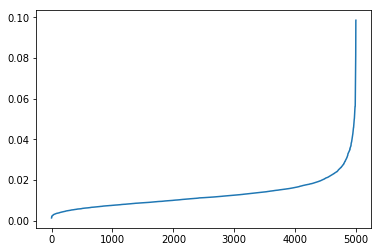

In [42]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

min_samples = 3 #since data dimension is 2

nn = NearestNeighbors(n_neighbors=min_samples)
nn.fit(data)
distances, indices = nn.kneighbors(data)

d = np.sort(distances[:,-1])
i = indices[:,0]

plt.plot(i,d)
plt.show()

# Defining DBSCAN Model

In [43]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=.04, min_samples=min_samples)
model = dbscan.fit(data)
print (model)

DBSCAN(algorithm='auto', eps=0.04, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=3, n_jobs=None, p=None)


# Clustering Graph with Outliers

    - Plot clusters and mark outliers as red colored stars

Number of outliers = 39


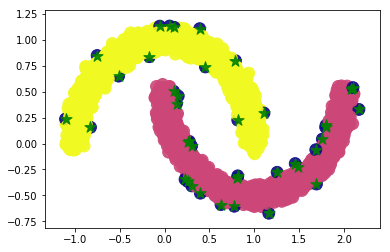

In [52]:
df = pd.DataFrame(data=data, columns=['X1','X2'])
df['labels'] = model.labels_

df_outliers = df[df['labels']==-1]
print ('Number of outliers =', df_outliers.shape[0])
plt.scatter(data[:,0], data[:,1], c=model.labels_, s=140, alpha=0.9, cmap="plasma")
plt.scatter(df_outliers['X1'], df_outliers['X2'], c='g', marker='*', s=140, alpha=0.9, cmap="plasma")
plt.show()